In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("mysore-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,HR,DY,MO,YEAR,RH2M,WS50M,WS50M.1
0,0,22.48,0.0,5,1,6,2011,93.75,1.58,1.58
1,1,22.87,0.0,6,1,6,2011,91.75,2.77,2.77
2,2,23.65,0.0,7,1,6,2011,87.94,4.29,4.29
3,3,24.71,0.0,8,1,6,2011,82.19,6.12,6.12
4,4,25.75,0.0,9,1,6,2011,76.12,7.53,7.53
...,...,...,...,...,...,...,...,...,...,...
86203,86203,26.73,1.0,0,1,4,2021,53.19,6.74,6.74
86204,86204,25.81,1.0,1,1,4,2021,60.38,6.83,6.83
86205,86205,24.81,1.0,2,1,4,2021,68.38,6.64,6.64
86206,86206,23.98,1.0,3,1,4,2021,75.75,6.09,6.09


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "HR","DY","MO","YEAR","RH2M","WS50M"], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.07581251, 0.03842641])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M        0.075813
WS50M.1    0.038426
dtype: float64

<AxesSubplot:>

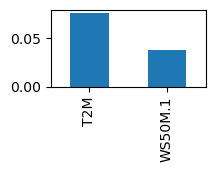

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({1.0: 35569, 0.0: 33397})
The number of classes after fit Counter({0.0: 35569, 1.0: 35569})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[4792 3558]
 [3436 5456]]
0.594362602946294
              precision    recall  f1-score   support

         0.0       0.58      0.57      0.58      8350
         1.0       0.61      0.61      0.61      8892

    accuracy                           0.59     17242
   macro avg       0.59      0.59      0.59     17242
weighted avg       0.59      0.59      0.59     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.5937387303665274

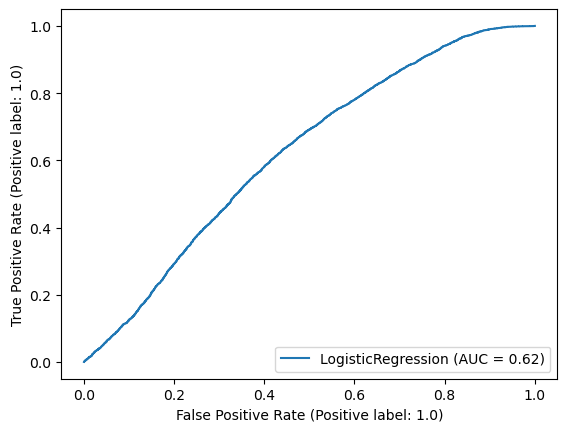

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[4596 3754]
 [2698 6194]]
0.6257974712910335
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.59      8350
         1.0       0.62      0.70      0.66      8892

    accuracy                           0.63     17242
   macro avg       0.63      0.62      0.62     17242
weighted avg       0.63      0.63      0.62     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6235001791289216

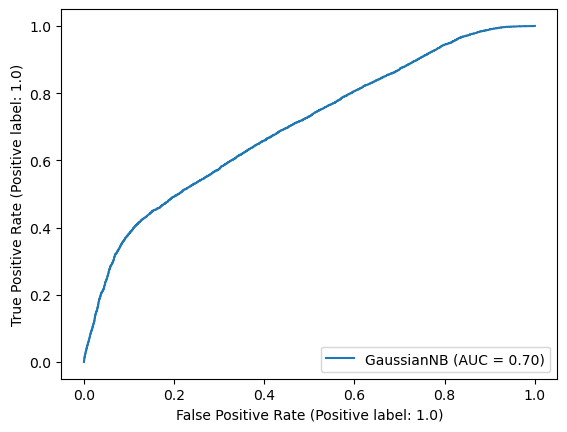

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


[[5068 3282]
 [3480 5412]]
0.6078181185477323
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60      8350
         1.0       0.62      0.61      0.62      8892

    accuracy                           0.61     17242
   macro avg       0.61      0.61      0.61     17242
weighted avg       0.61      0.61      0.61     17242



In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6077915424212305

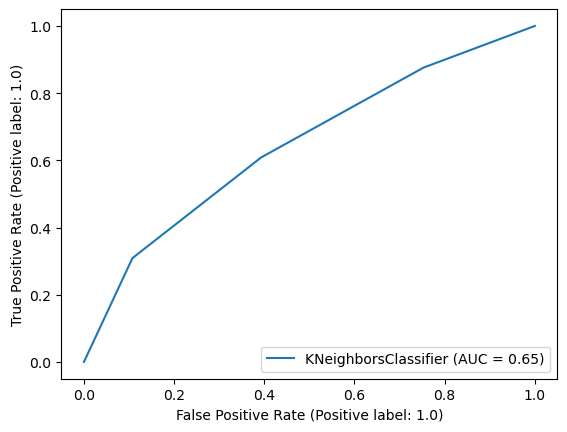

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[6528 1822]
 [4199 4693]]
0.6507945713954297
              precision    recall  f1-score   support

         0.0       0.61      0.78      0.68      8350
         1.0       0.72      0.53      0.61      8892

    accuracy                           0.65     17242
   macro avg       0.66      0.65      0.65     17242
weighted avg       0.67      0.65      0.65     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6547870924817032

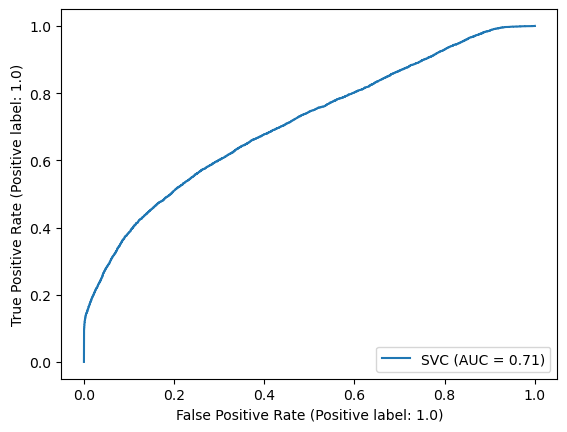

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[7466  884]
 [5423 3469]]
0.6342071685419325
              precision    recall  f1-score   support

         0.0       0.58      0.89      0.70      8350
         1.0       0.80      0.39      0.52      8892

    accuracy                           0.63     17242
   macro avg       0.69      0.64      0.61     17242
weighted avg       0.69      0.63      0.61     17242



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[5048 3302]
 [3396 5496]]
0.6115299849205429
              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60      8350
         1.0       0.62      0.62      0.62      8892

    accuracy                           0.61     17242
   macro avg       0.61      0.61      0.61     17242
weighted avg       0.61      0.61      0.61     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6113172844594211

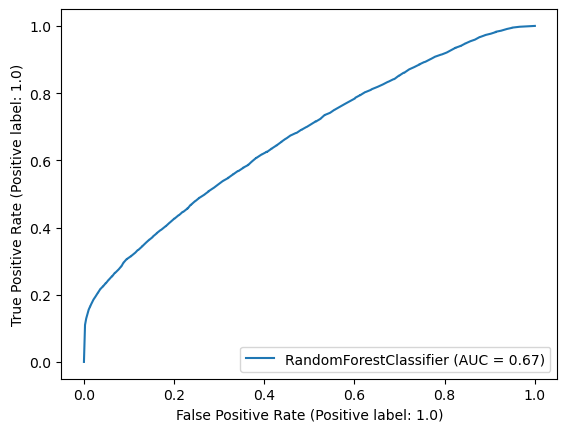

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.033708
0:	total: 88ms	remaining: 2m 55s
1:	total: 118ms	remaining: 1m 58s
2:	total: 130ms	remaining: 1m 26s
3:	total: 142ms	remaining: 1m 10s
4:	total: 158ms	remaining: 1m 2s
5:	total: 180ms	remaining: 59.7s
6:	total: 203ms	remaining: 57.7s
7:	total: 228ms	remaining: 56.8s
8:	total: 257ms	remaining: 56.9s
9:	total: 273ms	remaining: 54.3s
10:	total: 298ms	remaining: 53.9s
11:	total: 318ms	remaining: 52.6s
12:	total: 331ms	remaining: 50.6s
13:	total: 343ms	remaining: 48.6s
14:	total: 354ms	remaining: 46.9s
15:	total: 369ms	remaining: 45.7s
16:	total: 382ms	remaining: 44.6s
17:	total: 400ms	remaining: 44.1s
18:	total: 435ms	remaining: 45.3s
19:	total: 470ms	remaining: 46.5s
20:	total: 503ms	remaining: 47.4s
21:	total: 535ms	remaining: 48.1s
22:	total: 562ms	remaining: 48.3s
23:	total: 600ms	remaining: 49.4s
24:	total: 621ms	remaining: 49.1s
25:	total: 650ms	remaining: 49.3s
26:	total: 673ms	remaining: 49.2s
27:	total: 703ms	remaining: 49.5s
28:	total: 732ms	remainin

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[6116 2234]
 [3718 5174]]
0.6547964273286162
              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67      8350
         1.0       0.70      0.58      0.63      8892

    accuracy                           0.65     17242
   macro avg       0.66      0.66      0.65     17242
weighted avg       0.66      0.65      0.65     17242



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.6571632174247994

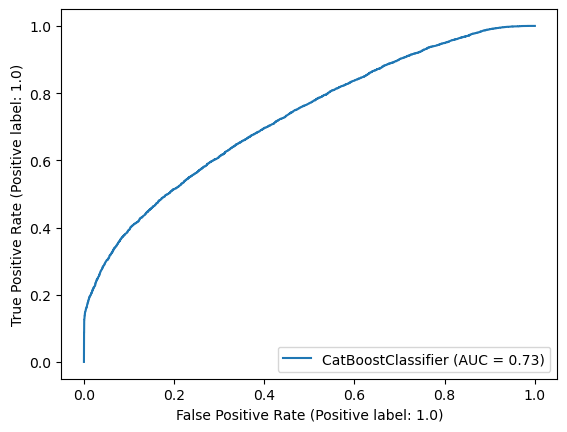

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']